# Assignment 1

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("D:/NEU/Courses/BDIA/Assignments/Assignment 1/Data/Forbes Top 2000/Forbes Top2000 2017.csv")
df.reset_index(drop = True, inplace = True)
df.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


## Data Cleaning:
#### Search for Missing Values:

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 Rank           2000 non-null int64
Company         2000 non-null object
Country         2000 non-null object
Sales           2000 non-null float64
Profits         2000 non-null float64
Assets          2000 non-null float64
Market Value    2000 non-null float64
Sector          1803 non-null object
Industry        1509 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 140.7+ KB


In [24]:
df.isnull().sum()

 Rank             0
Company           0
Country           0
Sales             0
Profits           0
Assets            0
Market Value      0
Sector          197
Industry        491
dtype: int64

In [25]:
df.dropna()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.400,42.000,3473.2,229.800,Financials,Major Banks
1,2,China Construction Bank,China,134.200,35.000,3016.6,200.500,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.900,24.100,620.9,409.900,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.500,24.200,2513.0,306.600,Financials,Major Banks
4,5,Wells Fargo,United States,97.600,21.900,1943.4,274.400,Financials,Major Banks
5,6,Agricultural Bank of China,China,115.700,27.800,2816.0,149.200,Financials,Regional Banks
6,7,Bank of America,United States,92.200,16.600,2196.8,231.900,Financials,Major Banks
7,8,Bank of China,China,113.100,24.900,2611.5,141.300,Financials,Major Banks
8,9,Apple,United States,217.500,45.200,331.1,752.000,Information Technology,Computer Hardware
9,10,Toyota Motor,Japan,249.900,17.100,412.5,171.900,Consumer Discretionary,Auto & Truck Manufacturers


No inappropriate values as of such

No false data detected and I have removed the null values.

### How is the data distributed?

### Summary Statistics:

In [26]:
df.describe()

,Rank,Sales,Profits,Assets,Market Value
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,17.664510,1.240713,84.533547,24.417845
std,577.494589,29.320116,2.918742,260.984489,44.761400
min,1.000000,0.001000,-13.000000,0.001000,0.072000
25%,500.750000,4.000000,0.318000,10.875000,6.600000
50%,1000.500000,8.800000,0.613000,22.900000,11.950000
75%,1500.250000,17.425000,1.300000,52.400000,24.400000
max,2000.000000,485.300000,45.200000,3473.200000,752.000000


In [27]:
df.Company

0                                    ICBC
1                 China Construction Bank
2                      Berkshire Hathaway
3                          JPMorgan Chase
4                             Wells Fargo
5              Agricultural Bank of China
6                         Bank of America
7                           Bank of China
8                                   Apple
9                            Toyota Motor
10                                   AT&T
11                              Citigroup
12                            Exxon Mobil
13                       General Electric
14                    Samsung Electronics
15                Ping An Insurance Group
16                        Wal-Mart Stores
17                 Verizon Communications
18                              Microsoft
19                      Royal Dutch Shell
20                                Allianz
21                           China Mobile
22                            BNP Paribas
23                               A

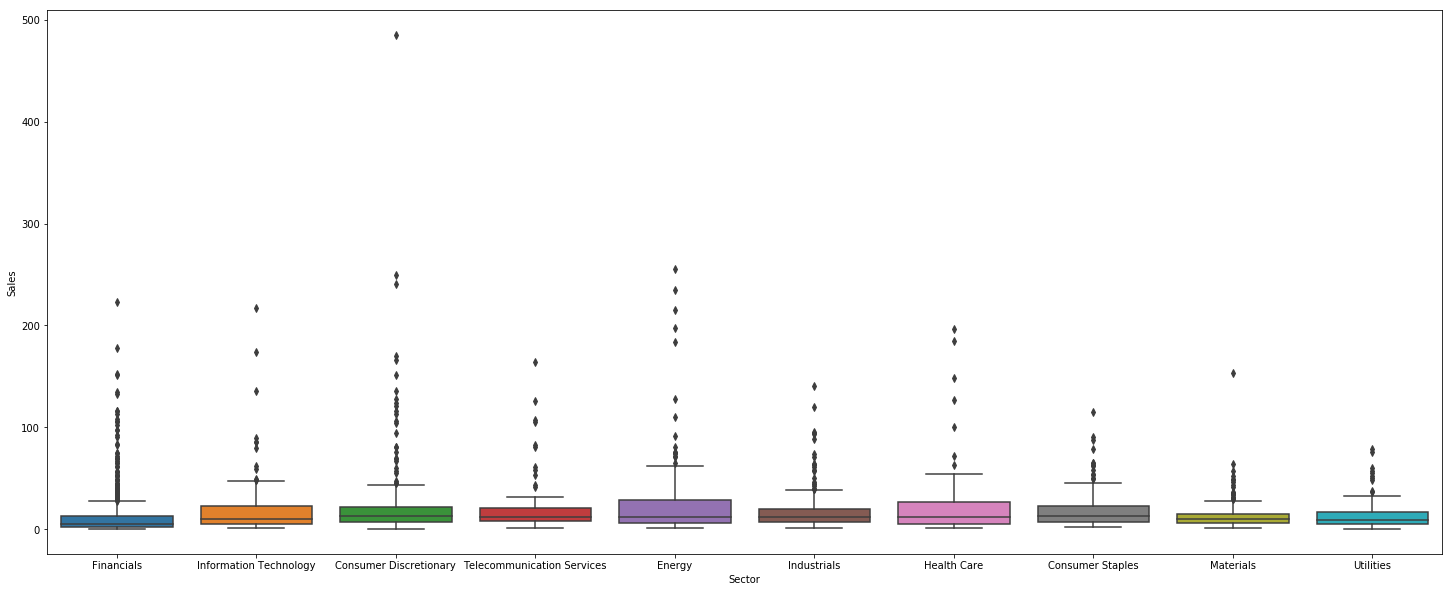

In [28]:
new_size = (25, 10)
fig, ax = plt.subplots(figsize = new_size)
sns.boxplot(x = "Sector", y = "Sales", data = df, ax = ax)

The above boxplot shows a visual represtation of the summary statistics and from it we can conculde that there are many outliers in the data specifically in each and every sector of the industry.

### Plotting each column:

Sales:

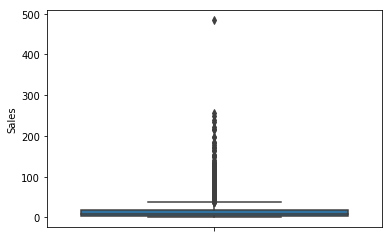

In [29]:
sns.boxplot(y=df["Sales"])

The above boxplot of the "Sales" column shows me that there a lot of variety of sale prices, many of them are counted as outliers here as those values are outside the inter quantile range. The boxplot shows that sales of many companies lie between 2 billion dollars to around 50 billion dollars.

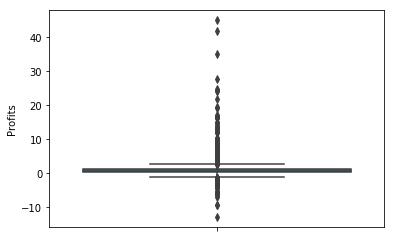

In [30]:
sns.boxplot(y=df["Profits"])

The "Profits" boxplot shows me that the interquantile range is a very small one as a result there are many outliers, postive ones and the negative ones. All companies in the data haven't experienced profits in the 2017. There are many companes from the dataset that have experienced losses in billions. On the other hand there have been companies that have profits on a whole new level with highest profit being around $45B.

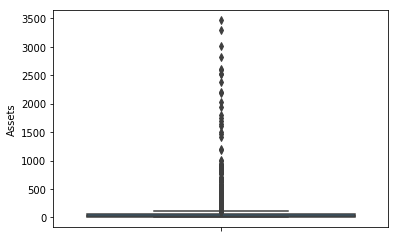

In [31]:
sns.boxplot(y=df["Assets"])

Again here I have a tiny boxplot with a small interquantile range and an almost invisible minimum. Majority of the data points here are outliers which convey that different companies have varying assets probably depending upon the rank of the company and how well established it is.

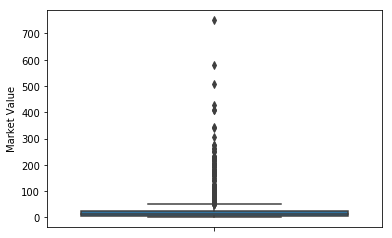

In [32]:
sns.boxplot(y=df["Market Value"])

The interquantile range lies approximately from $10B to $50B with the maximum being around $70 billion. There are a lot of outliers specially in the $70B - $350B region. The highest market value among all the companies in the dataset is of Apple which values at $752B.

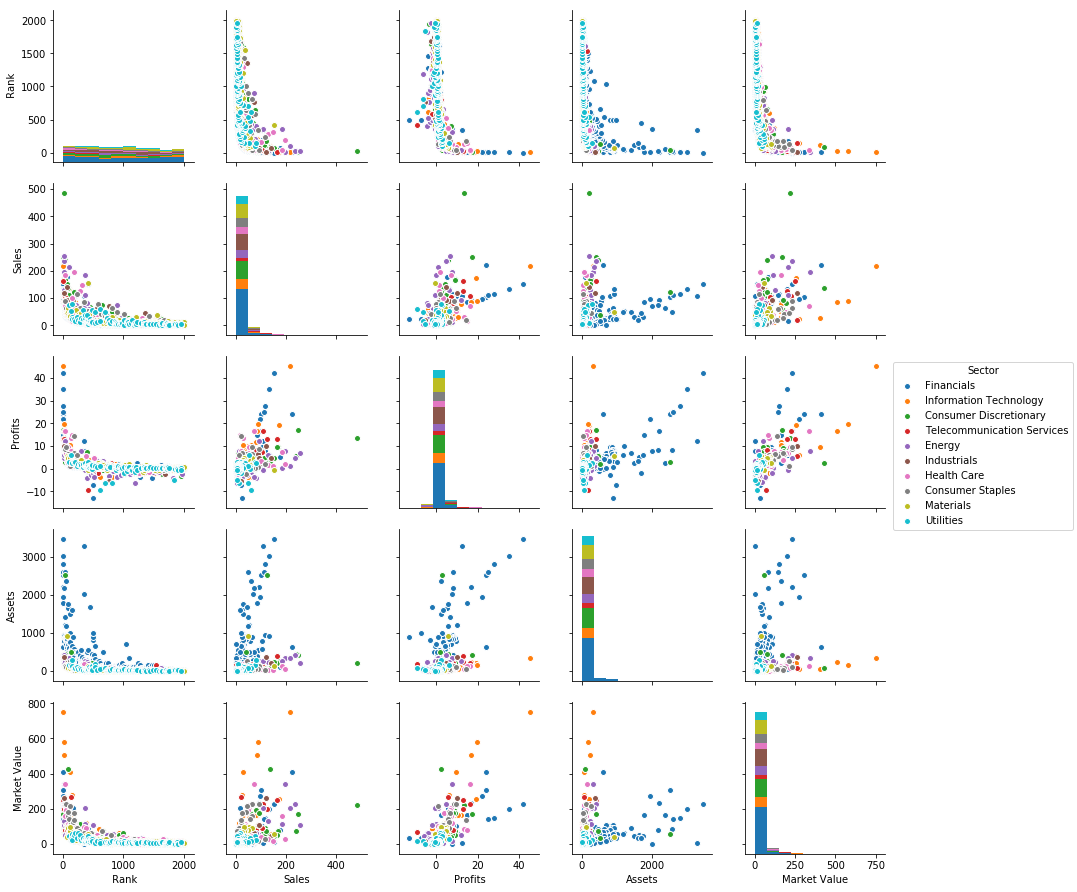

In [33]:
sns.pairplot(df, hue="Sector")

## EDA:

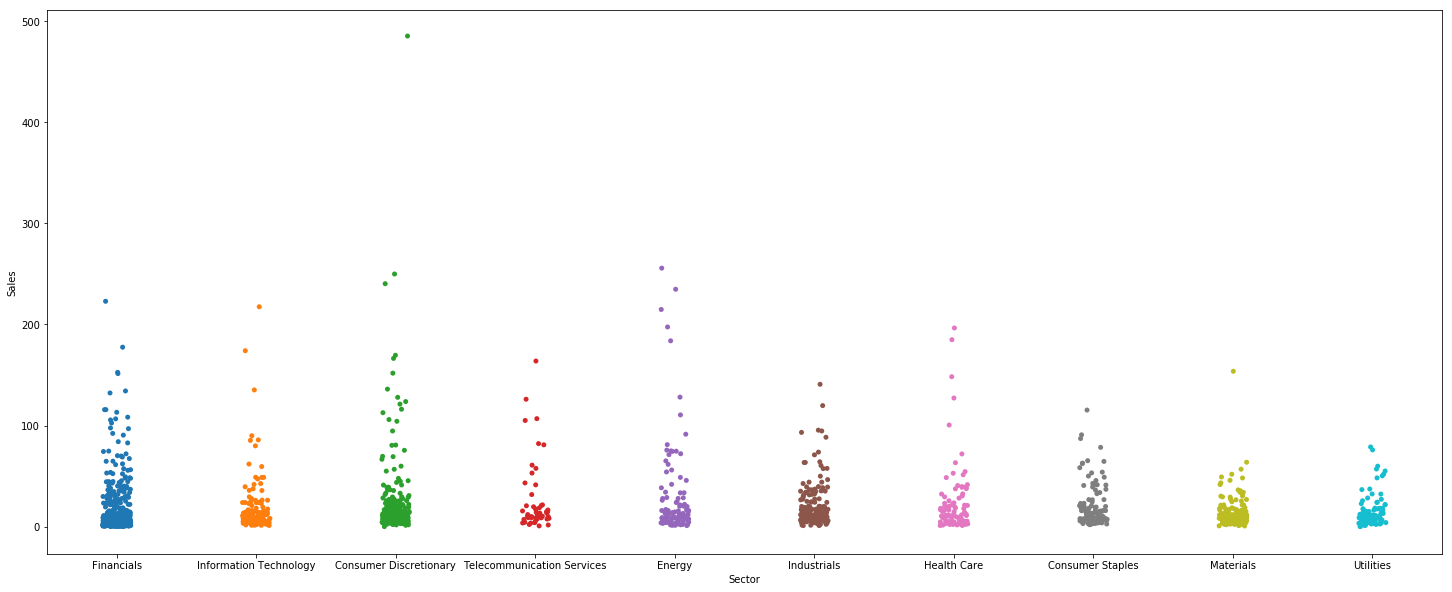

In [34]:
new_size = (25, 10)
fig, ax = plt.subplots(figsize = new_size)
sns.stripplot(x = "Sector", y = "Sales", data = df, ax = ax, jitter = True)

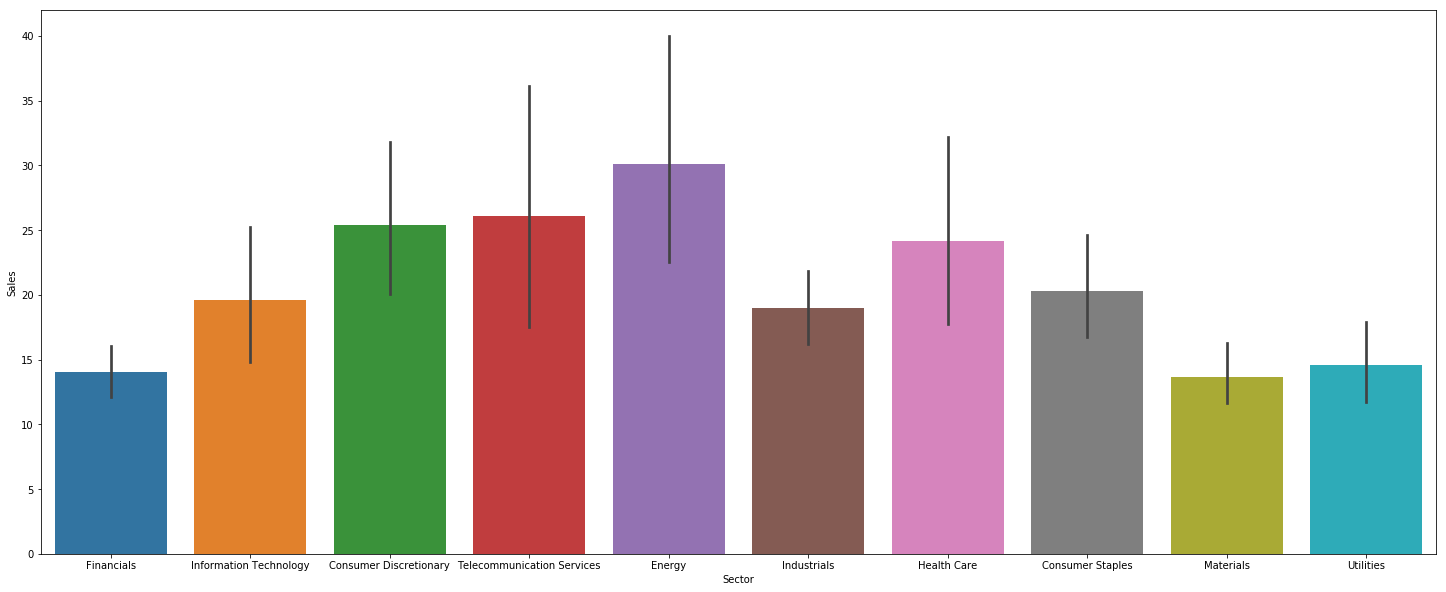

In [35]:
new_size = (25, 10)
fig, ax = plt.subplots(figsize = new_size)
sns.barplot(x = "Sector", y = "Sales", data = df, ax = ax)

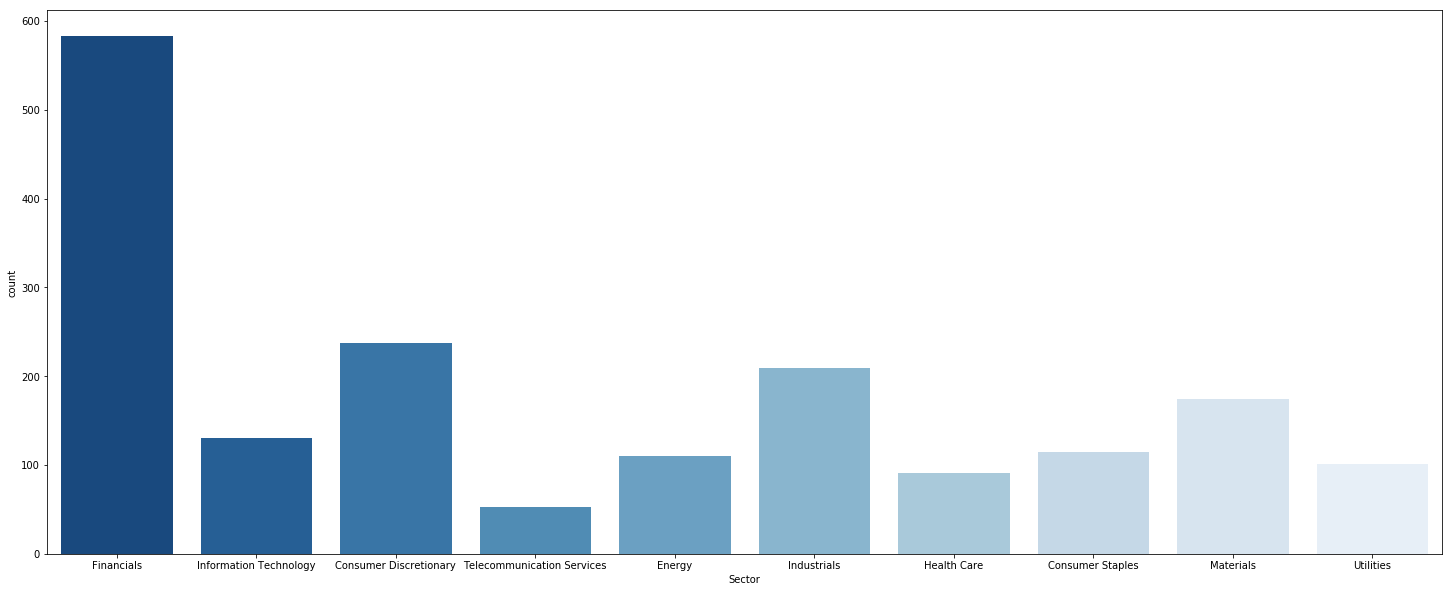

In [36]:
new_size = (25, 10)
fig, ax = plt.subplots(figsize = new_size)
sns.countplot(x = "Sector", data = df, ax = ax, palette="Blues_r")

## Part B:

### Linear Regression:

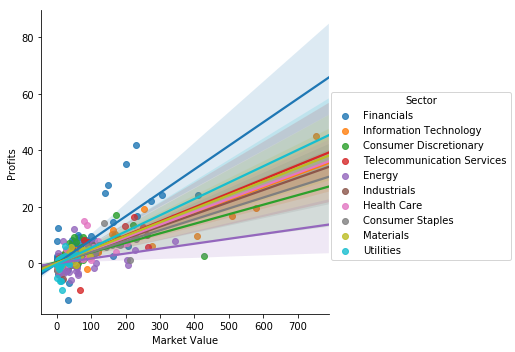

In [37]:
sns.lmplot(x = 'Market Value', y = 'Profits', data = df, hue = "Sector")

#### Using sklearn:

In [100]:
X = df[["Market Value"]]
y = df[["Profits"]]

#Fitting the model

model = linear_model.LinearRegression()
results = model.fit(X,y)

#print the coefficients

print(results.intercept_, results.coef_)

[0.06051781] [[0.04833329]]


In [101]:
model.score(X,y) #R square value

0.549425179289666

In [106]:
param_grid = dict(epochs=[10,20,30])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, y)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000001CF297F6C90, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\D...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000001CF297F6C90, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\D...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method PollIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'param_grid = dict(epochs=[10,20,30])\ngrid = Grid...ram_grid, n_jobs=-1)\ngrid_result = grid.fit(X, y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 22, 2, 41, 54, 848906, tzinfo=tzutc()), 'msg_id': '090026090aee401c86a884b6982ce8fa', 'msg_type': 'execute_request', 'session': 'b227fb1caa3e461987f28c82a89da61f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '090026090aee401c86a884b6982ce8fa', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'b227fb1caa3e461987f28c82a89da61f']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'param_grid = dict(epochs=[10,20,30])\ngrid = Grid...ram_grid, n_jobs=-1)\ngrid_result = grid.fit(X, y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 22, 2, 41, 54, 848906, tzinfo=tzutc()), 'msg_id': '090026090aee401c86a884b6982ce8fa', 'msg_type': 'execute_request', 'session': 'b227fb1caa3e461987f28c82a89da61f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '090026090aee401c86a884b6982ce8fa', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'b227fb1caa3e461987f28c82a89da61f'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'param_grid = dict(epochs=[10,20,30])\ngrid = Grid...ram_grid, n_jobs=-1)\ngrid_result = grid.fit(X, y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 22, 2, 41, 54, 848906, tzinfo=tzutc()), 'msg_id': '090026090aee401c86a884b6982ce8fa', 'msg_type': 'execute_request', 'session': 'b227fb1caa3e461987f28c82a89da61f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '090026090aee401c86a884b6982ce8fa', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='param_grid = dict(epochs=[10,20,30])\ngrid = Grid...ram_grid, n_jobs=-1)\ngrid_result = grid.fit(X, y)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'param_grid = dict(epochs=[10,20,30])\ngrid = Grid...ram_grid, n_jobs=-1)\ngrid_result = grid.fit(X, y)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('param_grid = dict(epochs=[10,20,30])\ngrid = Grid...ram_grid, n_jobs=-1)\ngrid_result = grid.fit(X, y)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('param_grid = dict(epochs=[10,20,30])\ngrid = Grid...ram_grid, n_jobs=-1)\ngrid_result = grid.fit(X, y)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='param_grid = dict(epochs=[10,20,30])\ngrid = Grid...ram_grid, n_jobs=-1)\ngrid_result = grid.fit(X, y)', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-106-07c110b78297>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1cf333c0128, executio..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000001CF333ABE40, file "<ipython-input-106-07c110b78297>", line 3>
        result = <ExecutionResult object at 1cf333c0128, executio..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000001CF333ABE40, file "<ipython-input-106-07c110b78297>", line 3>, result=<ExecutionResult object at 1cf333c0128, executio..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000001CF333ABE40, file "<ipython-input-106-07c110b78297>", line 3>
        self.user_global_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport matplotlib.pyplot as ...nTreeClassifier #for using Decision Tree Algoithm', 'df = pd.read_csv("D:/NEU/Courses/BDIA/Assignment...eset_index(drop = True, inplace = True)\ndf.head()', "df['Sector_Values'] = df['Sector']\ndf = df[['Com...alue', 'Sector', 'Sector_Values', 'Industry']]\ndf", 'df.Sector_Values = df.Sector_Values.replace({"Fi...aples": 8, "Industrials": 9, "Utilities": 10})\ndf', 'df.shape', 'train, test = train_test_split(df, test_size = 0.3)\nprint(train.shape)\nprint(test.shape)', "train_X = train[['Profits','Market Value']]\ntrai...its','Market Value']]\ntest_y = test.Sector_Values", "model = LogisticRegression()\nmodel.fit(train_X,t...on is',metrics.accuracy_score(prediction,test_y))", 'df.dropna()\ndf', 'df.dropna()', 'df.shape', 'train, test = train_test_split(df, test_size = 0.3)\nprint(train.shape)\nprint(test.shape)', "train_X = train[['Profits','Market Value']]\ntrai...its','Market Value']]\ntest_y = test.Sector_Values", "model = LogisticRegression()\nmodel.fit(train_X,t...on is',metrics.accuracy_score(prediction,test_y))", 'model = svm.SVC() #select the algorithm\nmodel.fi...edicted output by the model and the actual output', 'df.shape', 'df1 = df.dropna()', 'df1.shape', 'train, test = train_test_split(df, test_size = 0.3)\nprint(train.shape)\nprint(test.shape)', ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {2:     Rank                  Company        Country...         274.4  Financials          Major Banks  , 3:                                 Company         ...                   NaN  

[2000 rows x 9 columns], 4:                                 Company         ...                   NaN  

[2000 rows x 9 columns], 5: (2000, 9), 9:                                 Company         ...                   NaN  

[2000 rows x 9 columns], 10:                            Company         Count...        Regional Banks  

[1508 rows x 9 columns], 11: (2000, 9), 16: (2000, 9), 18: (1508, 9), 26: ([<matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>], <a list of 10 Text xticklabel objects>), ...}, 'X':       Market Value
0          229.800
1         ...0.595
1999         6.700

[2000 rows x 1 columns], 'YPrediction': array([ 1.,  1.,  1.,  1.,  3.,  1.,  1.,  1.,  ...1.,  9.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]), '_': 0.549425179289666, '_10':                            Company         Count...        Regional Banks  

[1508 rows x 9 columns], ...}
        self.user_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport matplotlib.pyplot as ...nTreeClassifier #for using Decision Tree Algoithm', 'df = pd.read_csv("D:/NEU/Courses/BDIA/Assignment...eset_index(drop = True, inplace = True)\ndf.head()', "df['Sector_Values'] = df['Sector']\ndf = df[['Com...alue', 'Sector', 'Sector_Values', 'Industry']]\ndf", 'df.Sector_Values = df.Sector_Values.replace({"Fi...aples": 8, "Industrials": 9, "Utilities": 10})\ndf', 'df.shape', 'train, test = train_test_split(df, test_size = 0.3)\nprint(train.shape)\nprint(test.shape)', "train_X = train[['Profits','Market Value']]\ntrai...its','Market Value']]\ntest_y = test.Sector_Values", "model = LogisticRegression()\nmodel.fit(train_X,t...on is',metrics.accuracy_score(prediction,test_y))", 'df.dropna()\ndf', 'df.dropna()', 'df.shape', 'train, test = train_test_split(df, test_size = 0.3)\nprint(train.shape)\nprint(test.shape)', "train_X = train[['Profits','Market Value']]\ntrai...its','Market Value']]\ntest_y = test.Sector_Values", "model = LogisticRegression()\nmodel.fit(train_X,t...on is',metrics.accuracy_score(prediction,test_y))", 'model = svm.SVC() #select the algorithm\nmodel.fi...edicted output by the model and the actual output', 'df.shape', 'df1 = df.dropna()', 'df1.shape', 'train, test = train_test_split(df, test_size = 0.3)\nprint(train.shape)\nprint(test.shape)', ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {2:     Rank                  Company        Country...         274.4  Financials          Major Banks  , 3:                                 Company         ...                   NaN  

[2000 rows x 9 columns], 4:                                 Company         ...                   NaN  

[2000 rows x 9 columns], 5: (2000, 9), 9:                                 Company         ...                   NaN  

[2000 rows x 9 columns], 10:                            Company         Count...        Regional Banks  

[1508 rows x 9 columns], 11: (2000, 9), 16: (2000, 9), 18: (1508, 9), 26: ([<matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>, <matplotlib.axis.XTick object>], <a list of 10 Text xticklabel objects>), ...}, 'X':       Market Value
0          229.800
1         ...0.595
1999         6.700

[2000 rows x 1 columns], 'YPrediction': array([ 1.,  1.,  1.,  1.,  3.,  1.,  1.,  1.,  ...1.,  9.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]), '_': 0.549425179289666, '_10':                            Company         Count...        Regional Banks  

[1508 rows x 9 columns], ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
D:\NEU\Courses\BDIA\Assignments\Assignment 1\<ipython-input-106-07c110b78297> in <module>()
      1 param_grid = dict(epochs=[10,20,30])
      2 grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
----> 3 grid_result = grid.fit(X, y)

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...turn_train_score='warn', scoring=None, verbose=0), X=      Market Value
0          229.800
1         ...0.595
1999         6.700

[2000 rows x 1 columns], y=      Profits
0      42.000
1      35.000
2     ...8    0.071
1999    0.469

[2000 rows x 1 columns], groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=3, random_state=None, shuffle=False)>
        X =       Market Value
0          229.800
1         ...0.595
1999         6.700

[2000 rows x 1 columns]
        y =       Profits
0      42.000
1      35.000
2     ...8    0.071
1999    0.469

[2000 rows x 1 columns]
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Sep 21 22:41:57 2018
PID: 23216          Python 3.6.4: C:\Users\Dhruv Patel\Anaconda3\python.exe
...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),       Market Value
0          229.800
1         ...0.595
1999         6.700

[2000 rows x 1 columns],       Profits
0      42.000
1      35.000
2     ...8    0.071
1999    0.469

[2000 rows x 1 columns], {'score': <function _passthrough_scorer>}, array([ 667,  668,  669, ..., 1997, 1998, 1999]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 659, 660, 661, 662,
       663, 664, 665, 666]), 0, {'epochs': 10}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),       Market Value
0          229.800
1         ...0.595
1999         6.700

[2000 rows x 1 columns],       Profits
0      42.000
1      35.000
2     ...8    0.071
1999    0.469

[2000 rows x 1 columns], {'score': <function _passthrough_scorer>}, array([ 667,  668,  669, ..., 1997, 1998, 1999]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 659, 660, 661, 662,
       663, 664, 665, 666]), 0, {'epochs': 10})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), X=      Market Value
0          229.800
1         ...0.595
1999         6.700

[2000 rows x 1 columns], y=      Profits
0      42.000
1      35.000
2     ...8    0.071
1999    0.469

[2000 rows x 1 columns], scorer={'score': <function _passthrough_scorer>}, train=array([ 667,  668,  669, ..., 1997, 1998, 1999]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 659, 660, 661, 662,
       663, 664, 665, 666]), verbose=0, parameters={'epochs': 10}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method BaseEstimator.set_params of Linear..., fit_intercept=True, n_jobs=1, normalize=False)>
        parameters = {'epochs': 10}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\sklearn\base.py in set_params(self=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), **params={'epochs': 10})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'epochs'
        self = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter epochs for estimator LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

In [110]:
# Grid Search for Algorithm Tuning

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X,y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

ValueError: Invalid parameter alpha for estimator LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [112]:
model.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

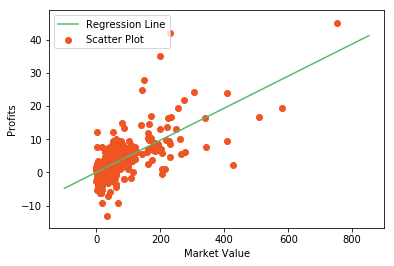

In [39]:
# Plotting Values and Regression Line
X2 = df['Market Value']
Y2 = df['Profits']

max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y3 = 0.06051781 + 0.04833329 * x

# Ploting Line
plt.plot(x, y3, color='#58b970', label='Regression Line')

# Ploting Scatter Points
plt.scatter(X2, Y2, c='#ef5423', label='Scatter Plot')

plt.xlabel('Market Value')
plt.ylabel('Profits')
plt.legend()
plt.show()

#### Using statsmodel:

In [94]:
import statsmodels.api as sm

model = sm.OLS(y,X)
results = model.fit()
results.summary()

C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Profits   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     3236.
Date:                Fri, 21 Sep 2018   Prob (F-statistic):               0.00
Time:                        22:04:51   Log-Likelihood:                -4183.2
No. Observations:                2000   AIC:                             8368.
Df Residuals:                    1999   BIC:                             8374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Market Value     0.0489      0.001     56.884      0.000       0.047       0.051
==============================================================================
Omnibus:                     1659.611   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           346532.376
Skew:                           3.054   Prob(JB):                         0.00
Kurtosis:                      67.196   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
print('Parameters:', results.params)
print('R2:', results.rsquared)

Parameters: Market Value    0.048902
dtype: float64
R2: 0.6181308567970871


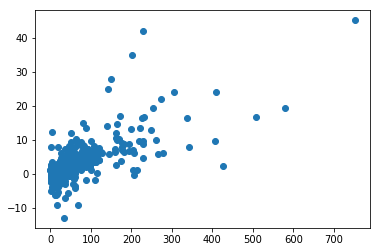

In [96]:
X = df[["Market Value"]]
y = df[["Profits"]]
plt.plot(X, y, "o")

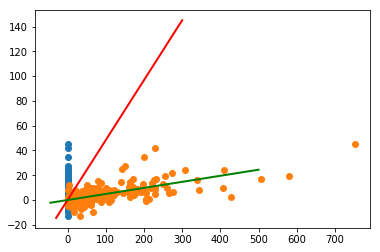

In [97]:
#We need an intercept here so lets find one
X = sm.add_constant(X) #  Our model needs an intercept so we add a column of 1s:
plt.plot(X, y, "o")
x2 = np.linspace(-30, 300, 10)
y2 = 0.0605 + (0.4833*x2)
plt.plot(x2, y2, lw=2, color="r")
x2 = np.linspace(-45, 500, 3)
y2 = (0.048902*x2)
plt.plot(x2, y2, lw=2, color="g")
plt.show()

In [98]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Profits   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     2436.
Date:                Fri, 21 Sep 2018   Prob (F-statistic):               0.00
Time:                        22:05:11   Log-Likelihood:                -4182.5
No. Observations:                2000   AIC:                             8369.
Df Residuals:                    1998   BIC:                             8380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0605      0.050      1.212      0.226      -0.037       0.158
Market Value     0.0483      0.001     49.359      0.000       0.046       0.050
==============================================================================
Omnibus:                     1693.885   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           352969.883
Skew:                           3.167   Prob(JB):                         0.00
Kurtosis:                      67.773   Cond. No.                         58.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const           0.060518
Market Value    0.048333
dtype: float64
R2:  0.5494251792896662


### Logistic Regression:

In [4]:
df.groupby('Sector').count()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Industry
Sector,,,,,,,,
Consumer Discretionary,237,237,237,237,237,237,237,209
Consumer Staples,115,115,115,115,115,115,115,106
Energy,110,110,110,110,110,110,110,79
Financials,583,583,583,583,583,583,583,474
Health Care,91,91,91,91,91,91,91,71
Industrials,209,209,209,209,209,209,209,192
Information Technology,130,130,130,130,130,130,130,103
Materials,174,174,174,174,174,174,174,145
Telecommunication Services,53,53,53,53,53,53,53,43


In [3]:
df['Sector_Values'] = df['Sector']
df = df[['Company', 'Country', 'Sales','Profits','Assets', 'Market Value', 'Sector', 'Sector_Values', 'Industry']]
df

,Company,Country,Sales,Profits,Assets,Market Value,Sector,Sector_Values,Industry
0,ICBC,China,151.400,42.000,3473.2,229.800,Financials,Financials,Major Banks
1,China Construction Bank,China,134.200,35.000,3016.6,200.500,Financials,Financials,Regional Banks
2,Berkshire Hathaway,United States,222.900,24.100,620.9,409.900,Financials,Financials,Investment Services
3,JPMorgan Chase,United States,102.500,24.200,2513.0,306.600,Financials,Financials,Major Banks
4,Wells Fargo,United States,97.600,21.900,1943.4,274.400,Financials,Financials,Major Banks
5,Agricultural Bank of China,China,115.700,27.800,2816.0,149.200,Financials,Financials,Regional Banks
6,Bank of America,United States,92.200,16.600,2196.8,231.900,Financials,Financials,Major Banks
7,Bank of China,China,113.100,24.900,2611.5,141.300,Financials,Financials,Major Banks
8,Apple,United States,217.500,45.200,331.1,752.000,Information Technology,Information Technology,Computer Hardware
9,Toyota Motor,Japan,249.900,17.100,412.5,171.900,Consumer Discretionary,Consumer Discretionary,Auto & Truck Manufacturers


In [4]:
df.Sector_Values = df.Sector_Values.replace({"Financials": 1, "Information Technology": 2, "Consumer Discretionary": 3, "Telecommunication Services": 4,"Energy": 5,"Health Care": 6,"Materials": 7,"Consumer Staples": 8, "Industrials": 9, "Utilities": 10})
df

,Company,Country,Sales,Profits,Assets,Market Value,Sector,Sector_Values,Industry
0,ICBC,China,151.400,42.000,3473.2,229.800,Financials,1.0,Major Banks
1,China Construction Bank,China,134.200,35.000,3016.6,200.500,Financials,1.0,Regional Banks
2,Berkshire Hathaway,United States,222.900,24.100,620.9,409.900,Financials,1.0,Investment Services
3,JPMorgan Chase,United States,102.500,24.200,2513.0,306.600,Financials,1.0,Major Banks
4,Wells Fargo,United States,97.600,21.900,1943.4,274.400,Financials,1.0,Major Banks
5,Agricultural Bank of China,China,115.700,27.800,2816.0,149.200,Financials,1.0,Regional Banks
6,Bank of America,United States,92.200,16.600,2196.8,231.900,Financials,1.0,Major Banks
7,Bank of China,China,113.100,24.900,2611.5,141.300,Financials,1.0,Major Banks
8,Apple,United States,217.500,45.200,331.1,752.000,Information Technology,2.0,Computer Hardware
9,Toyota Motor,Japan,249.900,17.100,412.5,171.900,Consumer Discretionary,3.0,Auto & Truck Manufacturers


In [17]:
df1 = df.dropna()

In [18]:
df1.shape

(1508, 9)

In [55]:
train, test = train_test_split(df1, test_size = 0.30)
print(train.shape)
print(test.shape)

(1055, 9)
(453, 9)


In [76]:
train_X = train[['Sales','Assets', 'Profits', 'Market Value']]
train_y = train.Sector_Values
test_X = test[['Sales','Assets', 'Profits', 'Market Value']]
test_y = test.Sector_Values

In [79]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression using scikit-learn is',metrics.accuracy_score(prediction,test_y))

The accuracy of Logistic Regression using scikit-learn is 0.434878587196468


In [82]:
YPrediction = model.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y,YPrediction)
print(confusion_matrix)

[[141   0   0   0   1   0   2   1   3   0]
 [ 17   1   5   0   0   0   1   0   1   0]
 [ 41   2  14   0   0   0   2   0   6   0]
 [  5   0   2   0   0   0   2   0   0   0]
 [ 23   0   0   0   0   0   1   0   0   0]
 [ 16   2   3   0   0   0   0   0   1   0]
 [ 28   1   9   0   0   0   4   0   5   0]
 [ 16   2   7   0   0   0   1   1   1   0]
 [ 36   1  14   0   0   0   4   0   7   1]
 [ 18   0   0   0   0   0   1   0   1   2]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(test_y,YPrediction))

             precision    recall  f1-score   support

        1.0       0.41      0.95      0.58       148
        2.0       0.11      0.04      0.06        25
        3.0       0.26      0.22      0.24        65
        4.0       0.00      0.00      0.00         9
        5.0       0.00      0.00      0.00        24
        6.0       0.00      0.00      0.00        22
        7.0       0.22      0.09      0.12        47
        8.0       0.50      0.04      0.07        28
        9.0       0.28      0.11      0.16        63
       10.0       0.67      0.09      0.16        22

avg / total       0.30      0.38      0.27       453



C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM:

In [85]:
model = svm.SVC()
model.fit(train_X,train_y) 
prediction=model.predict(test_X) 
print('The accuracy of Support Vector Machines using scikit-learn is:',metrics.accuracy_score(prediction,test_y)) 

The accuracy of Support Vector Machines using scikit-learn is: 0.37527593818984545


In [86]:
YPrediction = model.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y,YPrediction)
print(confusion_matrix)

[[141   0   0   0   1   0   2   1   3   0]
 [ 17   1   5   0   0   0   1   0   1   0]
 [ 41   2  14   0   0   0   2   0   6   0]
 [  5   0   2   0   0   0   2   0   0   0]
 [ 23   0   0   0   0   0   1   0   0   0]
 [ 16   2   3   0   0   0   0   0   1   0]
 [ 28   1   9   0   0   0   4   0   5   0]
 [ 16   2   7   0   0   0   1   1   1   0]
 [ 36   1  14   0   0   0   4   0   7   1]
 [ 18   0   0   0   0   0   1   0   1   2]]
